In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
# data
result_after = pd.read_csv('result.csv')
result_before = pd.read_csv('result_before_remove_equals.csv')
compare_after = pd.read_csv('compare.csv')
compare_before = pd.read_csv('compare_before_remove_equals.csv')

# Pre analysis

In [3]:
# columns name
print("results: " + ", ".join(result_after.columns.tolist()))
print("compare: " + ", ".join(compare_after.columns.tolist()))

results: projectname, version, domain, #LOC, #AA, %disciplined, %IF, %CA, %EI, %PA, %EX, %NC, total disciplined
compare: projectname, diff loc, diff blocks, diff % disciplined, diff disciplined


In [4]:
# show results
print(result_after)

    projectname    version                   domain      #LOC    #AA  \
0        apache     2.2.11               Web server     35873    350   
1        apache     2.4.46               Web server     78287    387   
2   berkeley.db       18.1               Web server    252018   3823   
3   berkeley.db     4.7.25               Web server    178003   3077   
4      cherokee    0.99.11          database system      4383     19   
5      cherokee    1.2.104          database system      5926     37   
6        clamav      0.104        antivirus program    166726   1439   
7        clamav     0.94.2        antivirus program     17379    237   
8       cpython      2.6.1      program interpreter    155860   4643   
9       cpython      3.9.3      program interpreter    203773   4036   
10          dia     0.96.1     diagramming software     13937     46   
11          dia     0.97.2     diagramming software     17526     80   
12        emacs       22.3              text editor      8654   

In [5]:
# show compare
print(compare_after)

    projectname  diff loc  diff blocks  diff % disciplined  diff disciplined
0        apache     42414           37                4.30                46
1   berkeley.db     74015          746                0.22               697
2      cherokee      1543           18               10.53                21
3        clamav    149347         1202                1.87              1092
4       cpython     47913         -607               -1.58              -650
5           dia      3589           34                4.35                37
6         emacs     33914         2261               -0.84              2113
7       freebsd   5969007        50749                0.42             46820
8           gcc   1472906         5849                2.61              5296
9          gimp    127583           91               -1.66                83
10        glibc    122509         1372                3.46              1377
11     gnumeric     -9585         -698                7.85              -569

In [6]:
compare_before_after = pd.concat([compare_before['projectname'], compare_after['projectname'], \
                                 compare_before['diff % disciplined'], compare_after['diff % disciplined'],\
                                 compare_before['diff loc'], compare_after['diff loc'], \
                                 compare_before['diff blocks'], compare_after['diff blocks']], \
                                axis=1, \
                                keys = ['name before','name after',\
                                        'diff % disc before', 'diff % disc after',\
                                        'diff loc before', 'diff loc after', \
                                        'diff blocks before', 'diff blocs after'])
print(compare_before_after)

    name before   name after  diff % disc before  diff % disc after  \
0        apache       apache                1.42               4.30   
1   berkeley.db  berkeley.db                0.29               0.22   
2      cherokee     cherokee                1.08              10.53   
3        clamav       clamav                5.29               1.87   
4       cpython      cpython               -0.66              -1.58   
5           dia          dia               -0.83               4.35   
6         emacs        emacs               -1.81              -0.84   
7       freebsd      freebsd                0.08               0.42   
8           gcc          gcc                0.31               2.61   
9          gimp         gimp                0.74              -1.66   
10        glibc        glibc                7.76               3.46   
11     gnumeric     gnumeric                6.67               7.85   
12      gnuplot      gnuplot               -0.02               5.15   
13    

<AxesSubplot:xlabel='name before'>

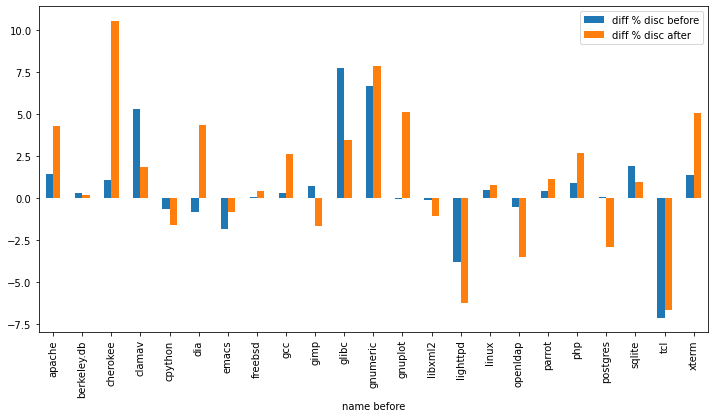

In [7]:
compare_before_after.plot(x='name before', y=['diff % disc before', 'diff % disc after'], kind='bar', figsize=(12,6))

In [8]:
candidates = compare_after.loc[compare_after['diff % disciplined'] > 3.0].append(compare_after.loc[compare_after['diff % disciplined'] < -3.0])

print(candidates)

print()
print("total > 3% or total < -3%: " + str(len(candidates)))

   projectname  diff loc  diff blocks  diff % disciplined  diff disciplined
0       apache     42414           37                4.30                46
2     cherokee      1543           18               10.53                21
5          dia      3589           34                4.35                37
10       glibc    122509         1372                3.46              1377
11    gnumeric     -9585         -698                7.85              -569
12     gnuplot      6418           28                5.15                28
22       xterm      6051          -29                5.05               -24
14    lighttpd     38937          732               -6.25               670
16    openldap     19108          248               -3.50               226
21         tcl     14393          345               -6.62               290

total > 3% or total < -3%: 10
